# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes
more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance,
 easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional
data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [74]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements.
Of paramount importance are the time-series, used to define time evolutions of a phenomenon.


In [75]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10) * 0.5, index=tuple(letters[:10]))
print("xs:", xs, '\n')
print("xs indexes:", xs.index, '\n')
# Values of the Series are actually a numpy array
print("xs values:", xs.values, type(xs.values), '\n')
print(xs['f'], xs.f, xs.h, '\n')
print(xs[['d', 'f', 'h']], '\n')
print(type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [76]:
# Extracting elements and operations: same as numpy array
print(xs[:3], '\n')
print(xs[7:], '\n')
print(xs[::3], '\n')
print(xs[xs > 3], '\n')
print(np.exp(xs), '\n')
print(np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [77]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b': 1, 'a': 'cat', 'c': [2, 3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on
label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [78]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    1.473966
b    0.192361
c   -0.760576
d    0.508957
e   -0.340345
dtype: float64
a         NaN
b    0.384722
c   -1.521153
d    1.017914
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas have a special
index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [79]:
# to define a date, the datetime module is very useful
import datetime as dt

date = dt.date.today()
print(date)

date = dt.datetime(2021, 11, 22, 12, 45, 10, 15)
print(date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2021'
# or alternatively
date = '22/11/2021 12:45:00'
print(date)

days = pd.date_range(date, periods=7, freq='D')
print(days)

seconds = pd.date_range(date, periods=3600, freq='s')
print(seconds)


2021-11-22
2021-11-22 12:45:10.000015
22/11/2021 12:45:00
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-23 12:45:00',
               '2021-11-24 12:45:00', '2021-11-25 12:45:00',
               '2021-11-26 12:45:00', '2021-11-27 12:45:00',
               '2021-11-28 12:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 12:45:01',
               '2021-11-22 12:45:02', '2021-11-22 12:45:03',
               '2021-11-22 12:45:04', '2021-11-22 12:45:05',
               '2021-11-22 12:45:06', '2021-11-22 12:45:07',
               '2021-11-22 12:45:08', '2021-11-22 12:45:09',
               ...
               '2021-11-22 13:44:50', '2021-11-22 13:44:51',
               '2021-11-22 13:44:52', '2021-11-22 13:44:53',
               '2021-11-22 13:44:54', '2021-11-22 13:44:55',
               '2021-11-22 13:44:56', '2021-11-22 13:44:57',
               '2021-11-22 13:44:58', '2021-11-22 13:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this
[link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas
objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [80]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print(type(ts))
print(ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print(ts)
print(ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [81]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print(tseries[0:4], '\n')
print(tseries['2021-11-22':'2021-11-23'], '\n')  # Note - includes end time


2021-11-22 12:45:00     8.161971
2021-11-23 12:45:00     9.365235
2021-11-24 12:45:00    11.373849
2021-11-25 12:45:00     8.185519
Freq: D, dtype: float64 

2021-11-22 12:45:00    8.161971
2021-11-23 12:45:00    9.365235
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [82]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R),
a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [83]:
entries = 10
dates = pd.date_range('11/22/2021 12:45:00', freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries, 4), index=dates, columns=['$T$ (K)', '$P$ (mPa)', '$V$ (dL)', '$\\alpha$'])
df


,$T$ (K),$P$ (mPa),$V$ (dL),$\alpha$
2021-11-22 12:45:00,-0.111842,0.230157,0.373076,-1.166709
2021-11-22 13:45:00,-1.600364,-0.551549,1.075172,1.096175
2021-11-22 14:45:00,0.573416,-1.016389,-1.032650,0.621485
2021-11-22 15:45:00,-0.677026,0.980877,1.569705,0.379586
2021-11-22 16:45:00,-0.515856,-0.745153,0.770311,-1.172578
2021-11-22 17:45:00,1.379727,0.375625,0.154702,0.086640
2021-11-22 18:45:00,1.206895,0.784317,-0.236255,-0.559726
2021-11-22 19:45:00,-0.242324,-0.874111,0.206466,2.436003
2021-11-22 20:45:00,1.374621,-1.241194,0.249091,-0.583731
2021-11-22 21:45:00,-1.016376,-1.477057,1.255866,1.635944


or by means of a dictionary:


In [84]:
df2 = pd.DataFrame(
    {'A': 1.,
     'B': pd.Timestamp(20130102),
     'C': pd.Series(1, index=range(4), dtype='float32'),
     'D': np.arange(7, 11),
     'E': pd.Categorical(["test", "train", "test", "train"]),
     }
)
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,1970-01-01 00:00:00.020130102,1.0,7,test
1,1.0,1970-01-01 00:00:00.020130102,1.0,8,train
2,1.0,1970-01-01 00:00:00.020130102,1.0,9,test
3,1.0,1970-01-01 00:00:00.020130102,1.0,10,train


### Viewing Data

In [85]:
df.head(2)

,$T$ (K),$P$ (mPa),$V$ (dL),$\alpha$
2021-11-22 12:45:00,-0.111842,0.230157,0.373076,-1.166709
2021-11-22 13:45:00,-1.600364,-0.551549,1.075172,1.096175


In [86]:
df.tail(4)

,$T$ (K),$P$ (mPa),$V$ (dL),$\alpha$
2021-11-22 18:45:00,1.206895,0.784317,-0.236255,-0.559726
2021-11-22 19:45:00,-0.242324,-0.874111,0.206466,2.436003
2021-11-22 20:45:00,1.374621,-1.241194,0.249091,-0.583731
2021-11-22 21:45:00,-1.016376,-1.477057,1.255866,1.635944


In [87]:
df.index

DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 13:45:00',
               '2021-11-22 14:45:00', '2021-11-22 15:45:00',
               '2021-11-22 16:45:00', '2021-11-22 17:45:00',
               '2021-11-22 18:45:00', '2021-11-22 19:45:00',
               '2021-11-22 20:45:00', '2021-11-22 21:45:00'],
              dtype='datetime64[ns]', freq='H')

In [88]:
df.columns

Index(['$T$ (K)', '$P$ (mPa)', '$V$ (dL)', '$\alpha$'], dtype='object')

In [89]:
df.values

array([[-0.11184193,  0.23015666,  0.37307564, -1.16670871],
       [-1.60036395, -0.55154938,  1.07517157,  1.09617474],
       [ 0.57341556, -1.01638855, -1.03264974,  0.62148539],
       [-0.67702561,  0.98087685,  1.56970515,  0.37958553],
       [-0.51585592, -0.74515292,  0.77031143, -1.17257757],
       [ 1.37972745,  0.37562505,  0.15470239,  0.08664037],
       [ 1.20689489,  0.78431711, -0.23625495, -0.55972642],
       [-0.24232434, -0.87411123,  0.20646557,  2.43600309],
       [ 1.37462127, -1.24119432,  0.24909089, -0.58373056],
       [-1.01637563, -1.47705698,  1.25586584,  1.6359444 ]])

In [90]:
df.describe()

,$T$ (K),$P$ (mPa),$V$ (dL),$\alpha$
count,10.000000,10.000000,10.000000,10.000000
mean,0.037087,-0.353448,0.438548,0.277309
std,1.051706,0.875654,0.764292,1.200511
min,-1.600364,-1.477057,-1.032650,-1.172578
25%,-0.636733,-0.980819,0.167643,-0.577730
50%,-0.177083,-0.648351,0.311083,0.233113
75%,1.048525,0.339258,0.998957,0.977502
max,1.379727,0.980877,1.569705,2.436003


In [91]:
df.T

,2021-11-22 12:45:00,2021-11-22 13:45:00,2021-11-22 14:45:00,2021-11-22 15:45:00,2021-11-22 16:45:00,2021-11-22 17:45:00,2021-11-22 18:45:00,2021-11-22 19:45:00,2021-11-22 20:45:00,2021-11-22 21:45:00
$T$ (K),-0.111842,-1.600364,0.573416,-0.677026,-0.515856,1.379727,1.206895,-0.242324,1.374621,-1.016376
$P$ (mPa),0.230157,-0.551549,-1.016389,0.980877,-0.745153,0.375625,0.784317,-0.874111,-1.241194,-1.477057
$V$ (dL),0.373076,1.075172,-1.032650,1.569705,0.770311,0.154702,-0.236255,0.206466,0.249091,1.255866
$\alpha$,-1.166709,1.096175,0.621485,0.379586,-1.172578,0.086640,-0.559726,2.436003,-0.583731,1.635944


In [92]:
df.sort_index(axis=0, ascending=True)

,$T$ (K),$P$ (mPa),$V$ (dL),$\alpha$
2021-11-22 12:45:00,-0.111842,0.230157,0.373076,-1.166709
2021-11-22 13:45:00,-1.600364,-0.551549,1.075172,1.096175
2021-11-22 14:45:00,0.573416,-1.016389,-1.032650,0.621485
2021-11-22 15:45:00,-0.677026,0.980877,1.569705,0.379586
2021-11-22 16:45:00,-0.515856,-0.745153,0.770311,-1.172578
2021-11-22 17:45:00,1.379727,0.375625,0.154702,0.086640
2021-11-22 18:45:00,1.206895,0.784317,-0.236255,-0.559726
2021-11-22 19:45:00,-0.242324,-0.874111,0.206466,2.436003
2021-11-22 20:45:00,1.374621,-1.241194,0.249091,-0.583731
2021-11-22 21:45:00,-1.016376,-1.477057,1.255866,1.635944


In [93]:
df.sort_values(by="C")

KeyError: 'C'

## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [ ]:
## standard and safe
print(df['A'], '\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print(df.A)

In [ ]:
# selecting rows by counting
print(df[0:3])

# or by index
print(df["2021-11-22 12:45:00":"2021-11-22 14:45:00"])

### Selection by label

In [ ]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

In [ ]:
# selecting on a multi-axis by label:
df.loc[:, ['A', 'B']]
#a=df.loc[:,['A','B']]

In [ ]:
# showing label slicing, both endpoints are included:
df.loc['2021-11-22 16:45:00':'2021-11-22 18:45:00', ['A', 'B']]

In [ ]:
# getting an individual element
print(df.loc[dates[1], 'A'])

# equivalently
print(df.at[dates[1], 'A'])

### Selecting by position

In [ ]:
# select via the position of the passed integers:
print(df.iloc[3], '\n')

# notation similar to numpy/python
print(df.iloc[3:5, 0:2])

In [ ]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1, 2, 4], [0, 2]]

In [ ]:
# slicing rows explicitly
print(df.iloc[1:3, :], '\n')

# slicing columns explicitly
print(df.iloc[:, 1:3])


In [ ]:
# selecting an individual element by position
print(df.iloc[1, 1])
print(df.iat[1, 1])


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [ ]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0] # En paralelo, al contrario que un 'for'

In [ ]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df > 0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

### Setting

Combination of selection and setting of values

In [ ]:
# setting values by label (same as by position)
df.at[dates[0], 'A'] = 0

# setting and assigning a numpy array
df.loc[:, 'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df)) * 0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df)) * 2, index=df.index)


In [ ]:
def dcos(theta):
    theta = theta * (np.pi / 180)
    return np.cos(theta)


df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

In [ ]:
# another example of global setting
df2 = df.copy()

df2[df2 < 0] = -df2
df2

In [ ]:
df

### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```
df = df.drop(....)
```

In [ ]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df = df.drop(columns=['E prime'])
new_df

In [ ]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1, 2, 3, 4]])

In [ ]:
df

In [ ]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2021-11-22 20:45:00"))

## Missing data

pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations.

In [ ]:
df_wNan = df[df > 0]
df_wNan

In [ ]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

In [ ]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

In [ ]:
# filling missing data
df_wNan.fillna(value=0)

Fill gaps forward or backward by propagating non-NA values forward or backward:

In [ ]:
df_wNan.fillna(method='pad')

## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the
actual operation between elements in a raw

In [ ]:
# Some statistics (mean() just as an example)
# raws
print(df.mean(axis=0), '\n')
# columns
print(df.mean(axis=1), '\n')

In [ ]:
# global operations on columns
df.apply(np.cumsum)

In [ ]:
df

In [ ]:
df.apply(lambda x: x.max() - x.min())

In [ ]:
# syntax is as usual similar to that of numpy arrays
df['A'] + df['B']

Let's play it hard and load (in memory) a (relatively) large dataset

In [105]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./

file_name = "./data_000637.txt"
data = pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [106]:
# the one-liner killing it all
data['timens'] = data['TDC_MEAS'] * 25 / 30 + data['BX_COUNTER'] * 25

In [107]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [102]:
# the old slooow way
def conversion(data):
    result = []
    for i in range(len(data)):
        result.append(data.loc[data.index[i], 'TDC_MEAS'] * 25 / 30. + data.loc[data.index[i], 'BX_COUNTER'] * 25)
    return result


data['timens'] = conversion(data)

NameError: name 'data' is not defined

## Merge

Pandas provide various facilities for easily combining Series, DataFrame, and Panel objects with various kinds
of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [ ]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

In [ ]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

In [ ]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

In [ ]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the
[doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [ ]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left, right, on="key")

## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [111]:
gdf = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.653846,2.548240
1,bar,one,0.825923,1.195687
2,foo,two,0.315150,0.344628
3,bar,three,0.620720,0.796856
4,foo,two,1.307338,-0.912136
5,bar,two,0.587203,-0.019793
6,foo,one,0.167595,-0.552469
7,foo,three,1.067786,-1.325396


In [112]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,2.033846,1.972751
foo,2.204023,0.102866


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it
enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures
like Series (1d) and DataFrame (2d).

In [94]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                  ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print(multi_index, '\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print(s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.852118
       two       1.937957
baz    one      -0.369678
       two      -0.551857
foo    one       0.511525
       two       1.219510
qux    one       0.125325
       two      -0.247904
dtype: float64


In [95]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A', 'B']).sum()

NameError: name 'gdf' is not defined

In [96]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A', 'B']).sum().stack()

NameError: name 'gdf' is not defined

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

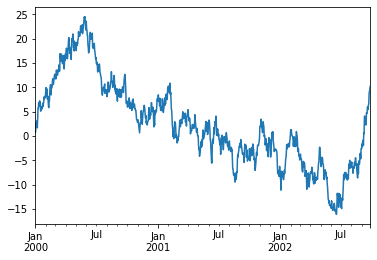

In [97]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

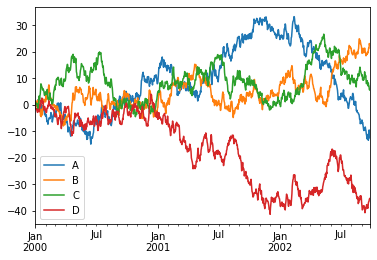

In [98]:
import matplotlib.pyplot as plt

pdf = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure()
pdf.plot()
plt.legend(loc='best')